<a href="https://colab.research.google.com/github/Szapt/Proyecto-Modelos1/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis (EDA)

The first step in data analysis and machine learning workflows, where we explore, visualize, and summarize a dataset to understand its structure, quality, and main patterns before applying models.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
d = pd.read_csv("train.csv")
print (d.shape)

(692500, 21)


In [ ]:
d.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
d['E_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [ ]:
d.columns

Index(['ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO',
       'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD',
       'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1',
       'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2',
       'INDICADOR_3', 'INDICADOR_4'],
      dtype='object')

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80827 entries, 0 to 80826
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           80827 non-null  int64  
 1   PERIODO_ACADEMICO            80827 non-null  int64  
 2   E_PRGM_ACADEMICO             80827 non-null  object 
 3   E_PRGM_DEPARTAMENTO          80826 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  80087 non-null  object 
 5   E_HORASSEMANATRABAJA         77194 non-null  object 
 6   F_ESTRATOVIVIENDA            77032 non-null  object 
 7   F_TIENEINTERNET              77703 non-null  object 
 8   F_EDUCACIONPADRE             78100 non-null  object 
 9   F_TIENELAVADORA              76188 non-null  object 
 10  F_TIENEAUTOMOVIL             75752 non-null  object 
 11  E_PRIVADO_LIBERTAD           80826 non-null  object 
 12  E_PAGOMATRICULAPROPIO        80064 non-null  object 
 13  F_TIENECOMPUTADO

In [ ]:
# Missing values per column
d.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [ ]:
# d["F_ESTRATOVIVIENDA"].mean()
# --> socioeconomic level isn't int. Data preprocessing task pending (Entrega 2)

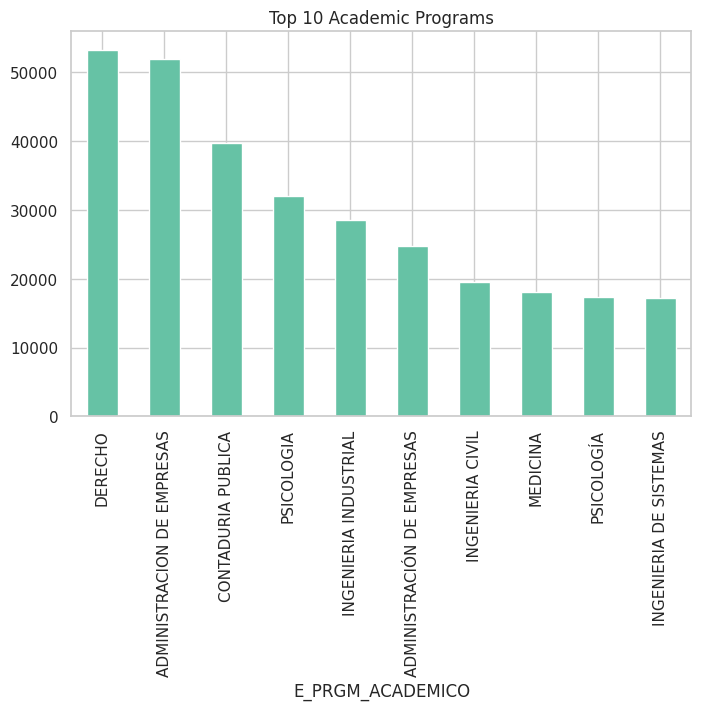

In [ ]:
# Shows just the 10 most common programs due to the size of the dataset

d['E_PRGM_ACADEMICO'].value_counts().head(10).plot(kind='bar', figsize=(8,5))

plt.title("Top 10 Academic Programs")
plt.show()

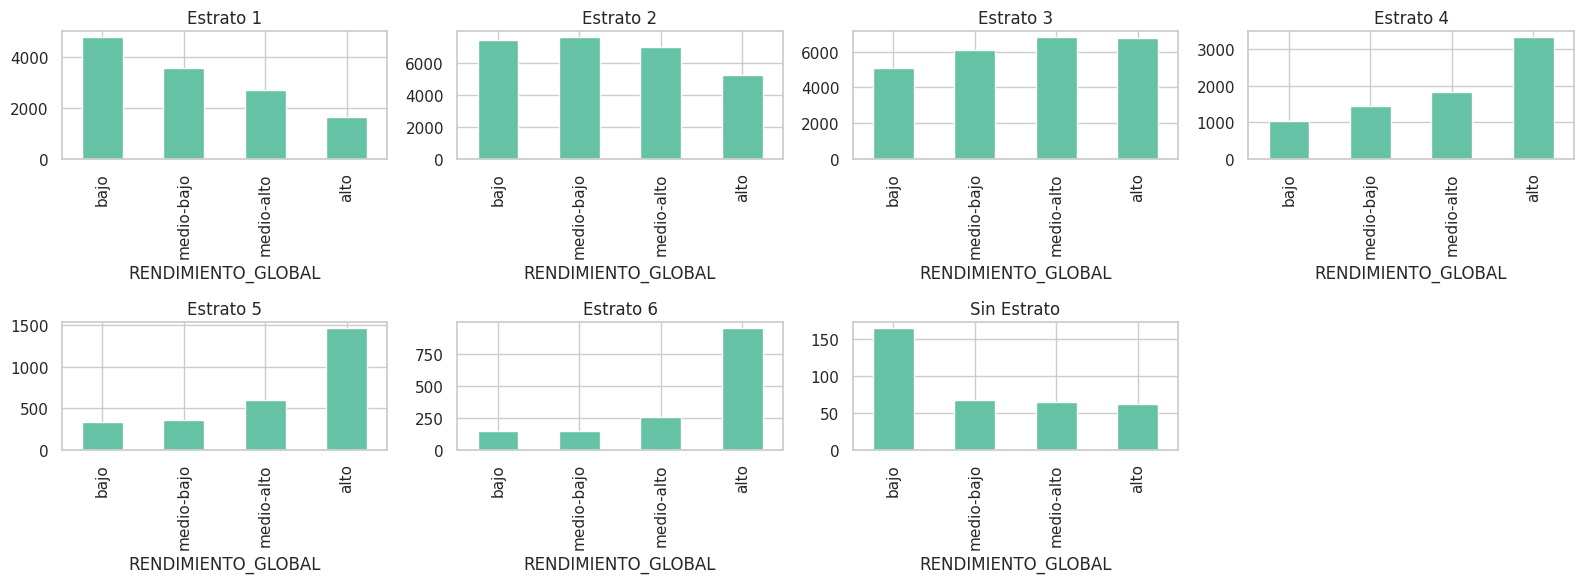

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

# Generates a separate bar plot showing the
# distribution of global performance for each socioeconomic level

c = sorted(d.F_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    dc = d[d.F_ESTRATOVIVIENDA==ci]
    dc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

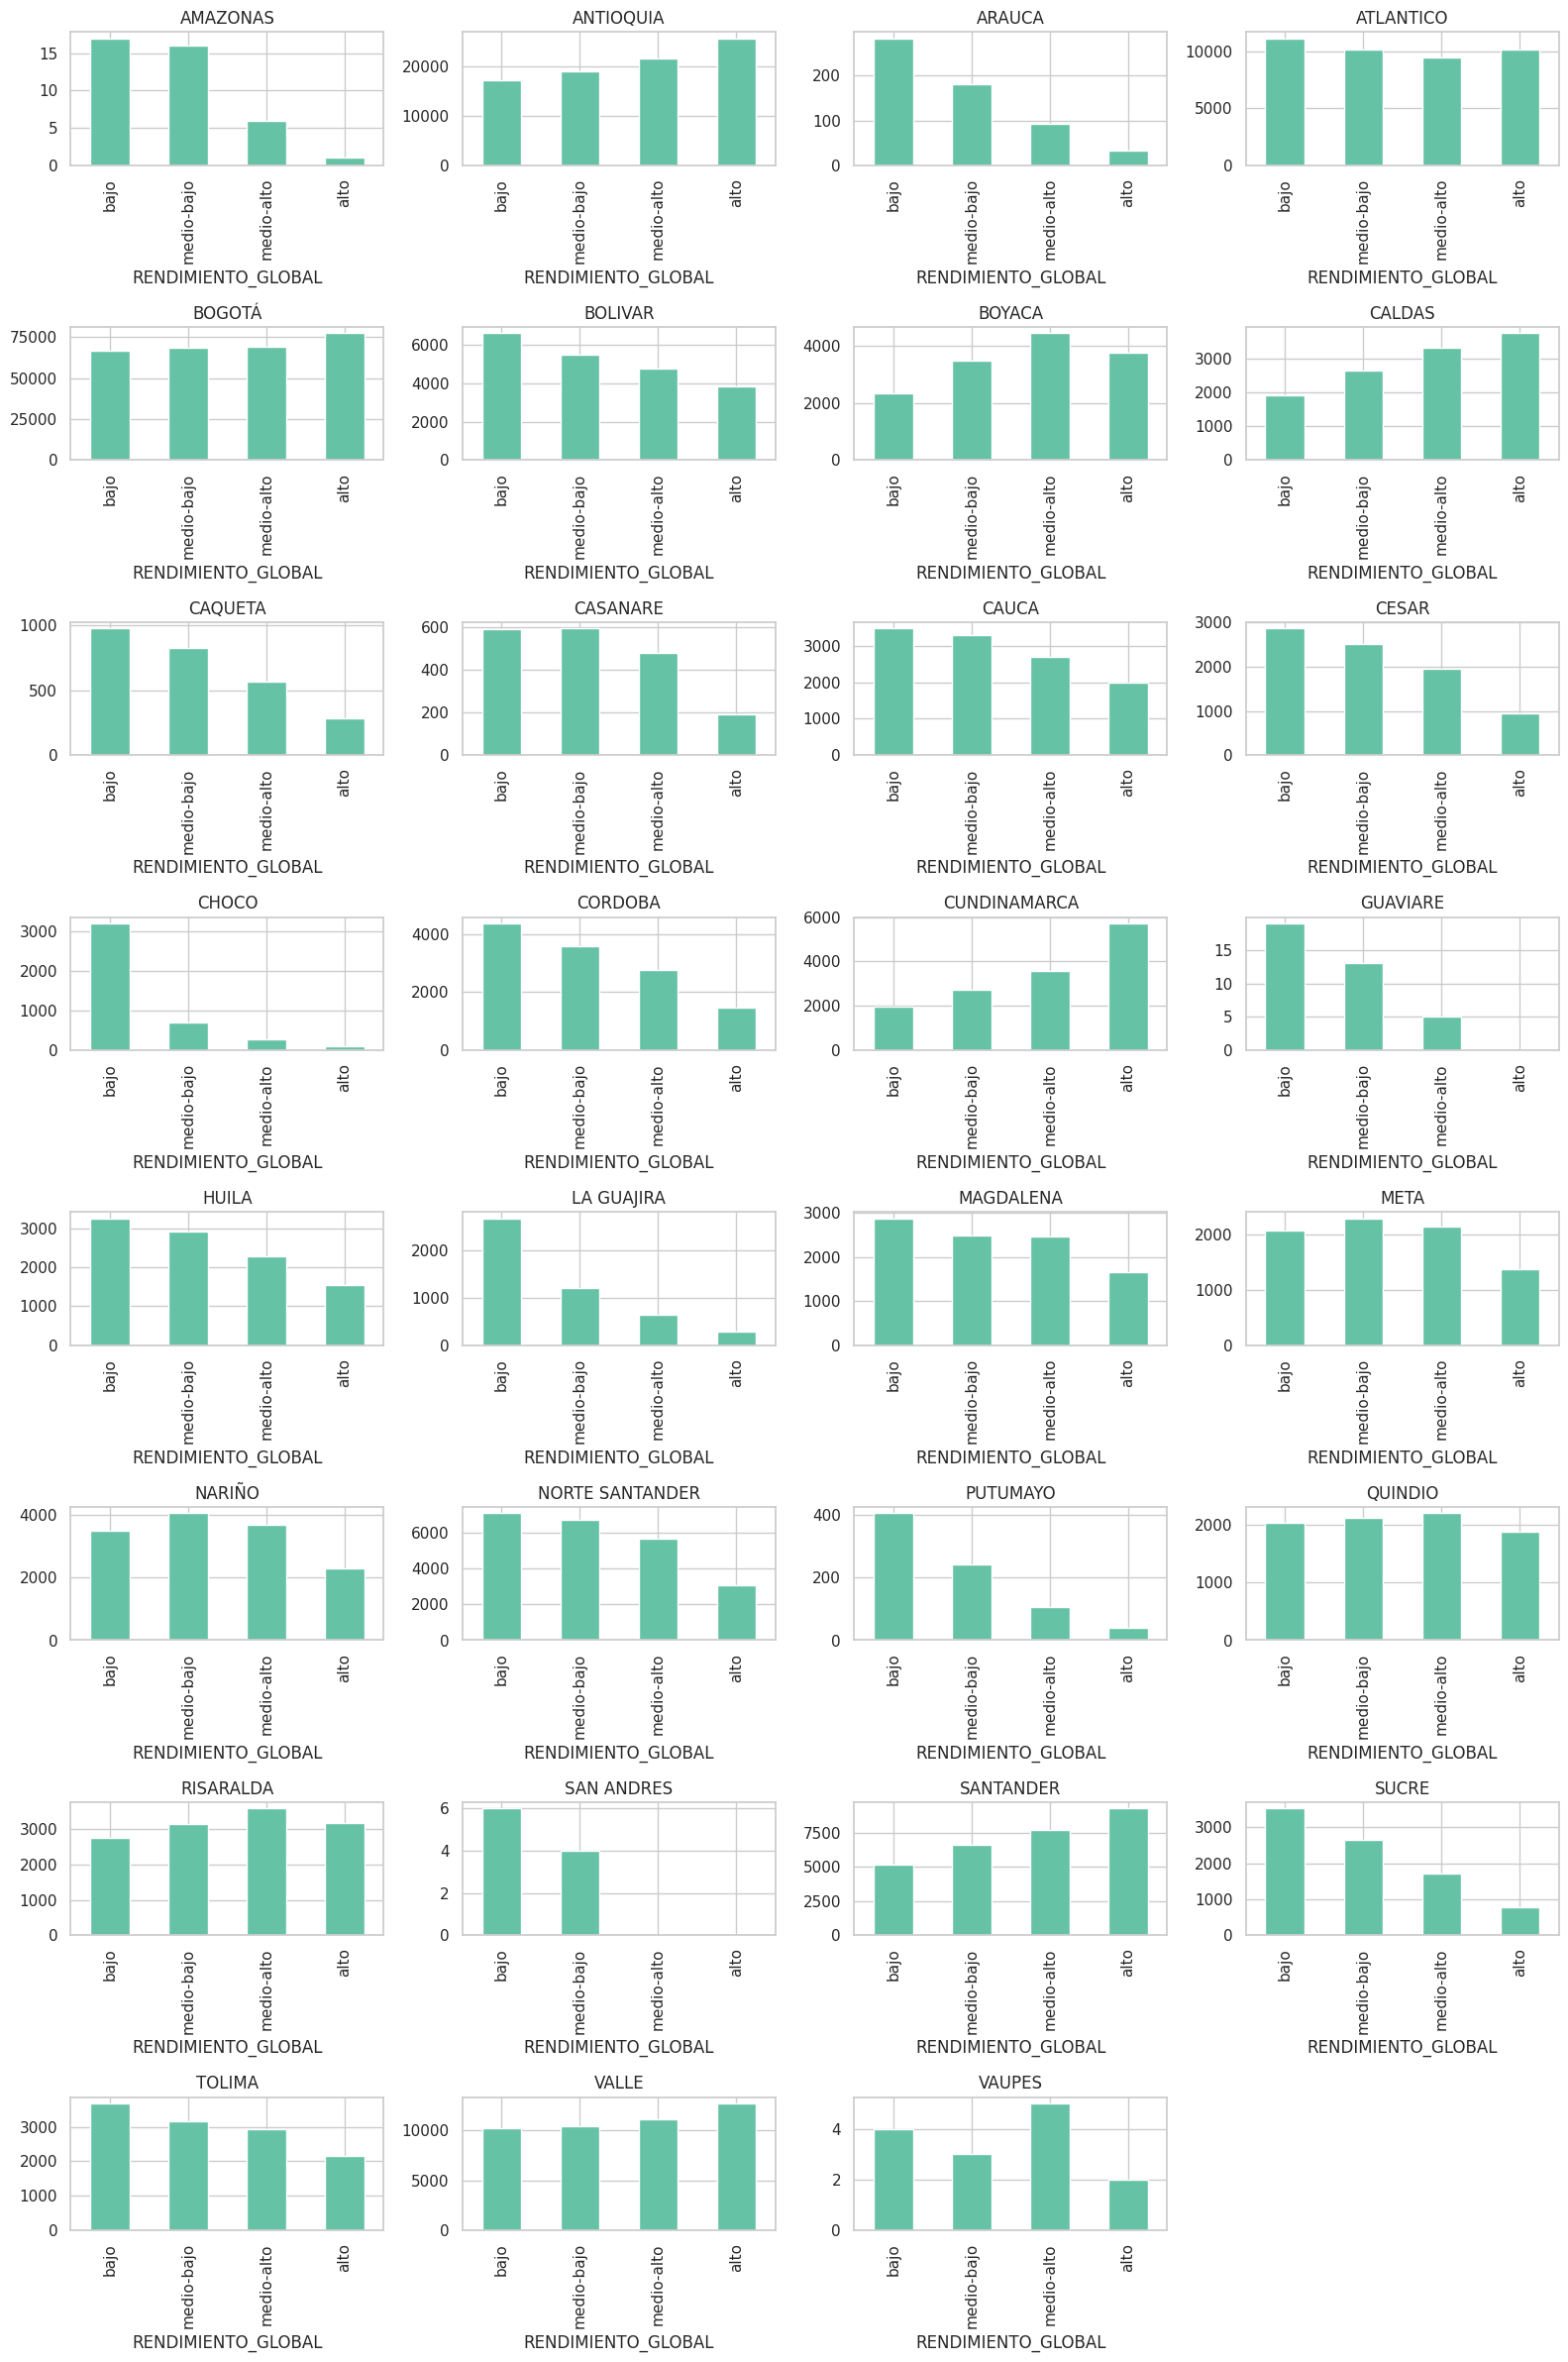

In [ ]:
c = sorted(d.E_PRGM_DEPARTAMENTO.value_counts().index)
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Generates a separate bar plot showing the
# distribution of global performance for each department
for ax, ci in subplots(c, n_cols=4, usizex=4):
    dc = d[d.E_PRGM_DEPARTAMENTO == ci]
    conteo = dc.RENDIMIENTO_GLOBAL.value_counts().reindex(orden)
    conteo.plot(kind='bar', ax=ax)
    plt.title(ci)


# The aim is to assess whether global performance is influenced by technological
# advancement and the level of infrastructure across Colombia’s departments.

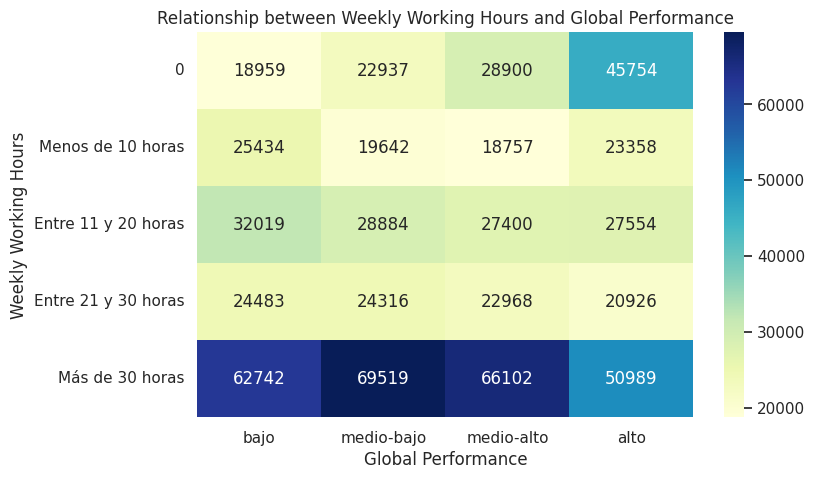

In [ ]:
# Create a crosstab to count the frequency of each combination
# between weekly working hours and global performance
tabla = pd.crosstab(d['E_HORASSEMANATRABAJA'], d['RENDIMIENTO_GLOBAL'])

# Define custom display order for both axes
orden_horas = ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas']
orden_rend = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Generate a heatmap based on the crosstab
plt.figure(figsize=(8,5))
sns.heatmap(tabla.loc[orden_horas, orden_rend], annot=True, fmt='d', cmap='YlGnBu')

# Configure chart title and axis labels
plt.title('Relationship between Weekly Working Hours and Global Performance')
plt.xlabel('Global Performance')
plt.ylabel('Weekly Working Hours')
plt.show()


In [ ]:
#Even though we can draw conclusions from the information above, a well-defined sample size is required in order to ensure fairness

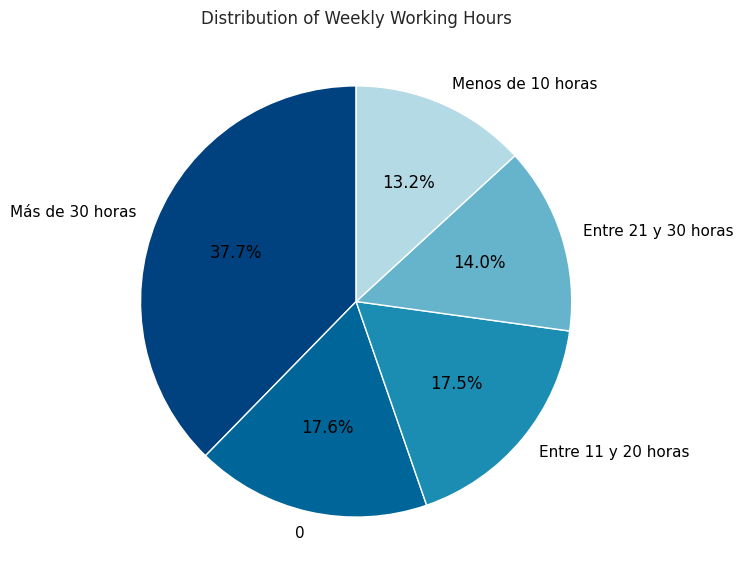

In [62]:

# Calculate the frequency of each working-hours category
horas_counts = d['E_HORASSEMANATRABAJA'].value_counts()

# Create a pie chart to visualize the proportion of each category
plt.figure(figsize=(7,7))
plt.pie(
    horas_counts,
    labels=horas_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color': 'Black'},
    colors = plt.cm.ocean(np.linspace(0.5, 0.9, 5))
)

# Configure chart title
plt.title('Distribution of Weekly Working Hours')
plt.show()


This is quite significant information, as most of the students surveyed likely have a part-time to full-time job alongside their studies.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


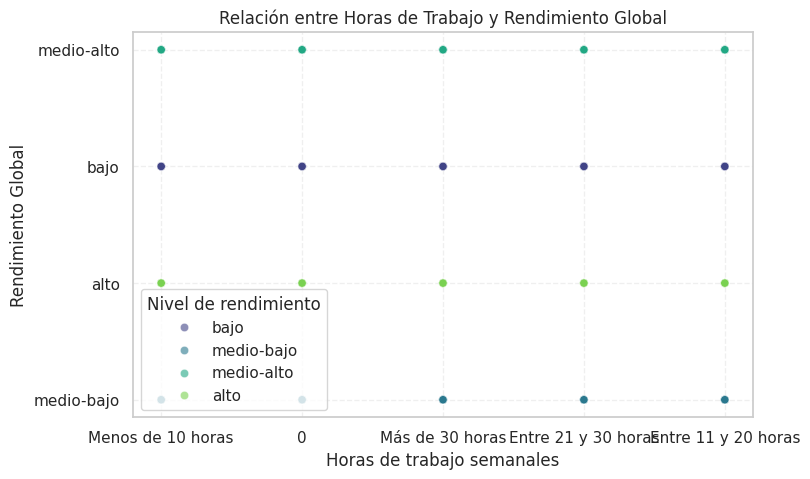

In [ ]:
# Define the order of performance levels
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# A scatter plot is typically used to identify possible trends or relationships between variables
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=d,
    x='E_HORASSEMANATRABAJA',
    y='RENDIMIENTO_GLOBAL',
    hue='RENDIMIENTO_GLOBAL',
    hue_order=orden,
    alpha=0.6,
    palette='viridis'
)

plt.title('Relación entre Horas de Trabajo y Rendimiento Global')
plt.xlabel('Horas de trabajo semanales')
plt.ylabel('Rendimiento Global')
plt.legend(title='Nivel de rendimiento')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

The result isn't the expected but this is mainly because both columns are categorial rather than numerical.

Pending for preprocessing

#Final thoughts
Although the dataset provides valuable categorical information, it also limits the type of visualizations that can be created at this stage. Many of these categorical variables could be cast or transformed into more informative numerical or ordinal representations; however, since no preprocessing has been applied yet, the analysis will remain in its current form.